### Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error

In [2]:
X, X_ivs, y, col_names = pickle.load(open("drd2_data.pickle", "rb"))

 ### Scaling

In [3]:
scaler = StandardScaler()
Xt=scaler.fit_transform(X)
Xt_ivs = scaler.transform(X_ivs)

### Feature selection: Random Forest

In [4]:
N,M=Xt.shape
rfr=RandomForestRegressor(random_state=0)
sel = SelectFromModel(estimator=rfr, threshold='mean') 
sel.fit(Xt, y)

print("Importances: ", sel.estimator_.feature_importances_)

print("Default threshold: ", sel.threshold_)

features=sel.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

Importances:  [3.40965876e-03 4.28307135e-03 2.42139274e-03 ... 8.64123118e-05
 4.11443839e-04 7.77656778e-05]
Default threshold:  0.00046904315196998124
The features selected are columns:  [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   22   23   24   25   26   27   28   29
   30   31   32   33   34   35   36   37   38   39   40   41   42   49
   51   52   55   62   67   74   83   96  103  122  142  152  154  157
  172  180  186  198  199  200  214  216  232  242  246  278  287  303
  310  316  326  335  336  347  348  351  352  353  357  359  362  364
  370  371  377  381  386  390  396  421  426  440  442  444  451  452
  454  455  459  470  472  487  494  502  513  525  533  536  538  546
  551  558  561  570  608  613  615  617  620  623  630  640  646  675
  676  679  695  699  717  719  722  727  728  747  758  769  770  778
  786  790  808  811  815  819  824  839  850  851  853  862  867  868
  871  873  876  879  886  88

In [5]:
nXt=sel.transform(Xt)
nXt_ivs=sel.transform(Xt_ivs)

### Train and test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(nXt, y, test_size=0.25, random_state=22)

### Statistics function

In [7]:
def Regr(y_test,preds):
    print("RVE: ", explained_variance_score(y_test,preds))
    print("RMSE: ", mean_squared_error(y_test,preds, squared=False))
    corr, pval=pearsonr(y_test,preds)
    print("Pearson Correlation Score: %6.4f (p-value=%e)\n"%(corr,pval))
    print("Maximum Error: ", max_error(y_test,preds))
    print("Mean Absolute Error: ", mean_absolute_error(y_test,preds))

    plt.figure(figsize=(3,3))
    plt.scatter(y_test,preds)
    plt.grid()
    plt.plot([0,1], [0,1], c="r") 
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.show()  

### Regression Models

#### Decision Tree

RVE:  0.3803645872011666
RMSE:  0.21718801037279045
Pearson Correlation Score: 0.6252 (p-value=1.366107e-199)

Maximum Error:  0.9208463396249998
Mean Absolute Error:  0.16421653952984297


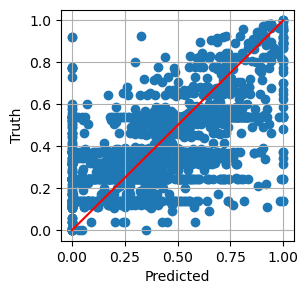

Best parameters: {'max_depth': 10, 'min_samples_leaf': 6}


In [8]:
MaxDepths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MinSamplesLeaves = [1, 2, 3, 4, 5, 6,7 ,8 ,9 ,10]
param_grid = {"max_depth": MaxDepths, "min_samples_leaf": MinSamplesLeaves}

mdl= DecisionTreeRegressor()
gs= GridSearchCV(estimator=mdl, param_grid=param_grid, scoring = 'explained_variance')
gs.fit(X_train, y_train)
preds = gs.best_estimator_.predict(X_test)

Regr(y_test,preds)
print("Best parameters:",gs.best_params_)

#### Random Forest

RVE:  0.448094672192901
RMSE:  0.20496259985932402
Pearson Correlation Score: 0.6707 (p-value=4.083559e-240)

Maximum Error:  0.7885571908841102
Mean Absolute Error:  0.1604458967415015


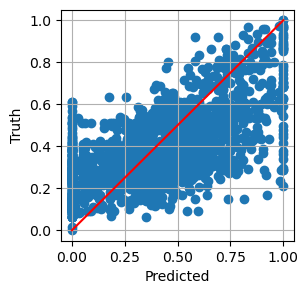

Best parameters: {'max_depth': 10, 'min_samples_leaf': 3}


In [9]:
MaxDepths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MinSamplesLeaves = [1, 2, 3, 4, 5, 6,7 ,8 ,9 ,10]
param_grid = {"max_depth": MaxDepths, "min_samples_leaf": MinSamplesLeaves}

mdl1 = RandomForestRegressor(n_estimators=5, random_state=22)
gs1= GridSearchCV(estimator=mdl1, param_grid=param_grid, scoring = 'explained_variance')
gs1.fit(X_train, y_train)
preds1= gs1.best_estimator_.predict(X_test)

Regr(y_test,preds1)
print("Best parameters:",gs1.best_params_)

#### Linear Regression

RVE:  0.4771078477754632
RMSE:  0.19950419561622812
Pearson Correlation Score: 0.6936 (p-value=2.024432e-263)

Maximum Error:  1.1612394752765502
Mean Absolute Error:  0.15411845762397658


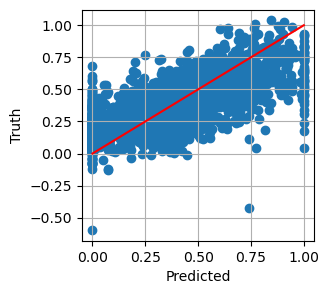

In [10]:
mdl2 = LinearRegression()
mdl2.fit(X_train, y_train)
preds2 = mdl2.predict(X_test)

Regr(y_test,preds2)

#### Ridge Regression

RVE:  0.48497453207088226
RMSE:  0.19799609588316036
Pearson Correlation Score: 0.6981 (p-value=2.814185e-268)

Maximum Error:  0.9730465708934635
Mean Absolute Error:  0.1539247806437194


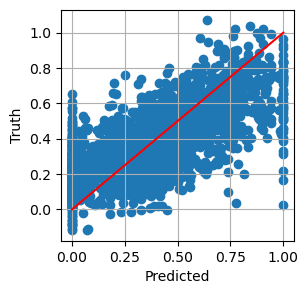

Best parameters: {'alpha': 10}


In [11]:
alphas = [0.1,0.5,1,3,5,8,10]
param_grid = {"alpha": alphas}

mdl3 = Ridge(max_iter=9999999)
gs2 = GridSearchCV(estimator=mdl3, param_grid=param_grid, scoring="explained_variance")
gs2 = gs2.fit(X_train, y_train)
preds3 = gs2.best_estimator_.predict(X_test)

Regr(y_test,preds3)
print("Best parameters:",gs2.best_params_)

#### Lasso Regression

RVE:  0.48963868276780464
RMSE:  0.1970979549336554
Pearson Correlation Score: 0.6997 (p-value=4.901678e-270)

Maximum Error:  0.9300945062177609
Mean Absolute Error:  0.15350338232432184


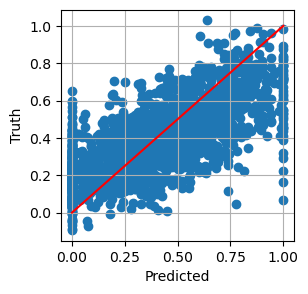

Best parameters: {'alpha': 0.001}


In [12]:
alphas = [0.0001,0.001,0.01,0.1,0.5,1]
param_grid = {"alpha": alphas}

mdl4 = Lasso(max_iter=9999999)
gs3 = GridSearchCV(estimator=mdl4, param_grid=param_grid, scoring="explained_variance")
gs3 = gs3.fit(X_train, y_train)
preds4 = gs3.best_estimator_.predict(X_test)

Regr(y_test,preds4)
print("Best parameters:",gs3.best_params_)

#### Support Vector Machine

RVE:  0.6294378836885013
RMSE:  0.1680657023567142
Pearson Correlation Score: 0.7934 (p-value=0.000000e+00)

Maximum Error:  0.9478650700422593
Mean Absolute Error:  0.12733326524704094


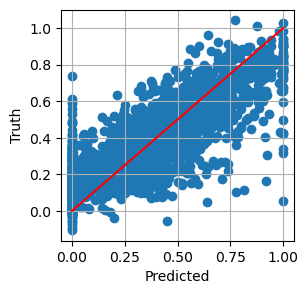

Best parameters: {'C': 3, 'gamma': 0.001}


In [13]:
gammas = [0.0001,0.001,0.01]
Cs = [2,3,4]
param_grid = {"gamma": gammas, "C": Cs}

mdl5 = svm.SVR()
gs4 = GridSearchCV(estimator=mdl5, param_grid=param_grid, scoring="explained_variance")
gs4 = gs4.fit(X_train, y_train)
preds5 = gs4.best_estimator_.predict(X_test)

Regr(y_test,preds5)
print("Best parameters:",gs4.best_params_)

#### Neural Network

RVE:  0.6182841716816633
RMSE:  0.17071440169651703
Pearson Correlation Score: 0.7910 (p-value=0.000000e+00)

Maximum Error:  0.9308127949635931
Mean Absolute Error:  0.12505964380251883


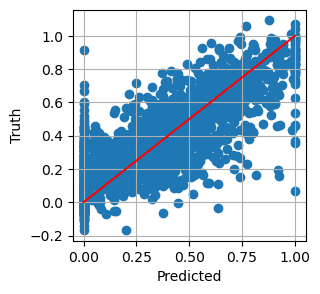

Best parameters: {'activation': 'relu', 'alpha': 10, 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}


In [14]:
hidden_layer_sizes = [10,50,100]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
alpha = [1,5,10]
param_grid = {"hidden_layer_sizes": hidden_layer_sizes, "activation": activation, "solver": solver, "alpha":alpha}

mdl6 = MLPRegressor(max_iter=9999999)
gs5 = GridSearchCV(estimator=mdl6, param_grid=param_grid, scoring="explained_variance")
gs5 = gs5.fit(X_train, y_train)
preds6 = gs5.best_estimator_.predict(X_test)

Regr(y_test,preds6)
print("Best parameters:",gs5.best_params_)

### Bagging for the best model

RVE:  0.6172791357508334
RMSE:  0.17084814367890963
Pearson Correlation Score: 0.7903 (p-value=0.000000e+00)

Maximum Error:  0.8820884800779667
Mean Absolute Error:  0.1321509814329978


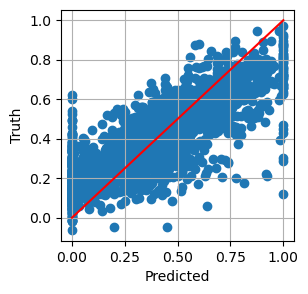

In [16]:
mdl7 = BaggingRegressor(estimator=mdl5, n_estimators=50, random_state=22)
mdl7.fit(X_train, y_train)
preds7=mdl7.predict(X_test)

Regr(y_test,preds7)

### Boosting for the best model

#### AdaBoost

RVE:  0.6153491223824996
RMSE:  0.17143871898912988
Pearson Correlation Score: 0.7856 (p-value=0.000000e+00)

Maximum Error:  0.8807324415455327
Mean Absolute Error:  0.13155763788464606


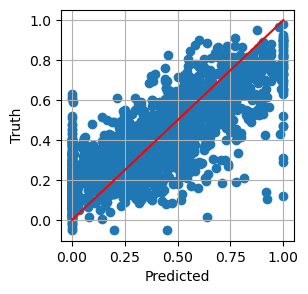

In [24]:
mdl8 = AdaBoostRegressor(estimator=mdl5, n_estimators=15, random_state=22)
mdl8.fit(X_train, y_train)
preds8=mdl8.predict(X_test)

Regr(y_test,preds8)

#### XGBoost

C:\Users\Mariana Coelho\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:02:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator" } are not used.

  warnings.warn(smsg, UserWarning)


RVE:  0.6122793373023416
RMSE:  0.17181942440516776
Pearson Correlation Score: 0.7828 (p-value=0.000000e+00)

Maximum Error:  0.9031623601913452
Mean Absolute Error:  0.12818235738668382


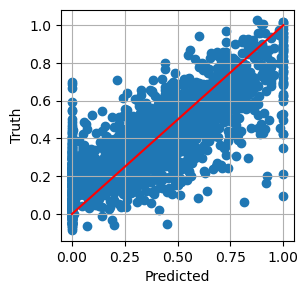

In [34]:
mdl10 = XGBRegressor(estimator=mdl5, n_estimators=100, random_state=22)
mdl10.fit(X_train, y_train)
preds10=mdl10.predict(X_test)

Regr(y_test,preds10)

### IVS for the best model

In [36]:
preds11 =mdl5.predict(nXt_ivs)

In [37]:
preds11

array([ 0.23862214,  0.61513351,  0.36744803,  0.52819014,  0.16693041,
        0.05377288,  0.39329021,  0.72284425,  0.27200145,  0.61634563,
        0.57015648,  0.40344373,  0.51131597,  0.16449744,  0.25166287,
        0.15514412,  0.23608138,  0.28079723,  0.3647712 ,  0.06192242,
        0.86959791,  0.29286893,  0.46561005,  0.17950661,  0.2579131 ,
        0.28172829,  0.15134707,  0.31144379,  0.28320393,  0.17502345,
        0.08037579,  0.46209261,  0.29057191,  0.50718095,  0.7704622 ,
        0.36744408,  0.26099271,  0.59511046,  0.2716737 ,  0.43637133,
        0.20604719,  0.00200457,  0.14039908,  0.44569696,  0.21456611,
        0.41644233,  0.77748321, -0.0422713 ,  0.33626651,  0.37781776,
        0.3057035 ,  0.27331398,  0.12273429,  0.30133702,  0.31336055,
        0.74428516,  0.5362883 ,  0.16960352,  0.44678323,  0.47900987,
        0.30637635,  0.54916167,  0.49553448,  0.35405911,  0.56315786,
        0.3917998 ,  0.45225531,  0.18602025,  0.55611637,  0.23

In [38]:
np.savetxt('05.txt', preds11,fmt='%f',delimiter='\t') #save predictions in txt form